In [ ]:
!pip install spacy watermark -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.6 MB/s eta 0:00:00


In [ ]:
!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from spacy import displacy

In [ ]:
# PIPELINE DE SPACY
# Cargar el modelo
nlp = spacy.load("es_core_news_lg")
import es_core_news_lg
nlp = es_core_news_lg.load()

In [ ]:
texto_ejemplo = 'La garza real (Ardea cinerea) es una especie de ave pelecaniforme de la familia Ardeidae propia del Viejo Mundo. Es residente en zonas templadas pero muchas migran en verano a zonas más frías y en invierno a zonas más cálidas.'

In [ ]:
# Procesar el texto con Spacy
doc = nlp(texto_ejemplo)

In [ ]:
# Tokenizacion
tokens = [token.text for token in doc]
print(tokens)

['La', 'garza', 'real', '(', 'Ardea', 'cinerea', ')', 'es', 'una', 'especie', 'de', 'ave', 'pelecaniforme', 'de', 'la', 'familia', 'Ardeidae', 'propia', 'del', 'Viejo', 'Mundo', '.', 'Es', 'residente', 'en', 'zonas', 'templadas', 'pero', 'muchas', 'migran', 'en', 'verano', 'a', 'zonas', 'más', 'frías', 'y', 'en', 'invierno', 'a', 'zonas', 'más', 'cálidas', '.']


In [ ]:
# Lematizacion: forma base de cada token
for token in doc:
    # Ignoramos puntuación y espacios para mayor claridad
    if not token.is_punct and not token.is_space:
        print(f"'{token.text}' -> '{token.lemma_}'")

'La' -> 'el'
'garza' -> 'garza'
'real' -> 'real'
'Ardea' -> 'Ardea'
'cinerea' -> 'cinerea'
'es' -> 'ser'
'una' -> 'uno'
'especie' -> 'especie'
'de' -> 'de'
'ave' -> 'ave'
'pelecaniforme' -> 'pelecaniforme'
'de' -> 'de'
'la' -> 'el'
'familia' -> 'familia'
'Ardeidae' -> 'Ardeidae'
'propia' -> 'propio'
'del' -> 'del'
'Viejo' -> 'Viejo'
'Mundo' -> 'Mundo'
'Es' -> 'ser'
'residente' -> 'residente'
'en' -> 'en'
'zonas' -> 'zona'
'templadas' -> 'templado'
'pero' -> 'pero'
'muchas' -> 'mucho'
'migran' -> 'migrar'
'en' -> 'en'
'verano' -> 'verano'
'a' -> 'a'
'zonas' -> 'zona'
'más' -> 'más'
'frías' -> 'frío'
'y' -> 'y'
'en' -> 'en'
'invierno' -> 'invierno'
'a' -> 'a'
'zonas' -> 'zona'
'más' -> 'más'
'cálidas' -> 'cálido'


In [ ]:
# Etiquetado gramatical
for token in doc:
    if not token.is_space: # Ignoramos espacios
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)}) -> {token.tag_}")

'La' -> DET (determiner) -> DET
'garza' -> PROPN (proper noun) -> PROPN
'real' -> PROPN (proper noun) -> PROPN
'(' -> PUNCT (punctuation) -> PUNCT
'Ardea' -> PROPN (proper noun) -> PROPN
'cinerea' -> PROPN (proper noun) -> PROPN
')' -> PUNCT (punctuation) -> PUNCT
'es' -> AUX (auxiliary) -> AUX
'una' -> DET (determiner) -> DET
'especie' -> NOUN (noun) -> NOUN
'de' -> ADP (adposition) -> ADP
'ave' -> NOUN (noun) -> NOUN
'pelecaniforme' -> NOUN (noun) -> NOUN
'de' -> ADP (adposition) -> ADP
'la' -> DET (determiner) -> DET
'familia' -> NOUN (noun) -> NOUN
'Ardeidae' -> PROPN (proper noun) -> PROPN
'propia' -> ADJ (adjective) -> ADJ
'del' -> ADP (adposition) -> ADP
'Viejo' -> PROPN (proper noun) -> PROPN
'Mundo' -> PROPN (proper noun) -> PROPN
'.' -> PUNCT (punctuation) -> PUNCT
'Es' -> AUX (auxiliary) -> AUX
'residente' -> NOUN (noun) -> NOUN
'en' -> ADP (adposition) -> ADP
'zonas' -> NOUN (noun) -> NOUN
'templadas' -> ADJ (adjective) -> ADJ
'pero' -> CCONJ (coordinating conjunction) -> C

In [ ]:
# Analisis de dependencia sintactica
for token in doc:
     if not token.is_space:
        print(f"'{token.text}' -> {token.dep_} ({spacy.explain(token.dep_)}) -> '{token.head.text}'")

'La' -> det (determiner) -> 'garza'
'garza' -> nsubj (nominal subject) -> 'especie'
'real' -> flat (flat multiword expression) -> 'garza'
'(' -> punct (punctuation) -> 'Ardea'
'Ardea' -> flat (flat multiword expression) -> 'garza'
'cinerea' -> flat (flat multiword expression) -> 'Ardea'
')' -> punct (punctuation) -> 'Ardea'
'es' -> cop (copula) -> 'especie'
'una' -> det (determiner) -> 'especie'
'especie' -> ROOT (root) -> 'especie'
'de' -> case (case marking) -> 'ave'
'ave' -> nmod (modifier of nominal) -> 'especie'
'pelecaniforme' -> amod (adjectival modifier) -> 'especie'
'de' -> case (case marking) -> 'familia'
'la' -> det (determiner) -> 'familia'
'familia' -> obj (object) -> 'pelecaniforme'
'Ardeidae' -> appos (appositional modifier) -> 'familia'
'propia' -> amod (adjectival modifier) -> 'Ardeidae'
'del' -> case (case marking) -> 'Viejo'
'Viejo' -> nmod (modifier of nominal) -> 'familia'
'Mundo' -> flat (flat multiword expression) -> 'Viejo'
'.' -> punct (punctuation) -> 'especie

In [ ]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

In [ ]:
if doc.ents:
    print("Entidades encontradas:")
    print("Texto de la Entidad -> Etiqueta (Tipo)")
    for ent in doc.ents:
        print(f"'{ent.text}' -> {ent.label_} ({spacy.explain(ent.label_)})")
else:
    print("No se encontraron entidades nombradas en este texto.")

Entidades encontradas:
Texto de la Entidad -> Etiqueta (Tipo)
'Ardea cinerea' -> LOC (Non-GPE locations, mountain ranges, bodies of water)
'Viejo Mundo' -> LOC (Non-GPE locations, mountain ranges, bodies of water)


In [ ]:
displacy.render(doc,style='ent',jupyter=True,options={'distance':200})

## Ejemplo practico

In [ ]:
from collections import Counter

In [ ]:
wiki_txt = """
La fotosíntesis es el proceso químico fundamental mediante el cual las plantas verdes, algas y algunas bacterias convierten la energía lumínica del sol en energía química. Utilizan dióxido de carbono del aire y agua del suelo para producir glucosa, su alimento principal, liberando oxígeno como subproducto. La clorofila, un pigmento verde en los cloroplastos, es crucial para capturar esta energía solar.
Este proceso sustenta casi toda la vida en la Tierra.
"""

In [ ]:
print(f"'{wiki_txt[:150]}...'") # Muestra un fragmento

'
La fotosíntesis es el proceso químico fundamental mediante el cual las plantas verdes, algas y algunas bacterias convierten la energía lumínica del s...'


In [ ]:
doc = nlp(wiki_txt)
print("¡Texto procesado!")

¡Texto procesado!


In [ ]:
# Segmentación de oraciones
list(doc.sents)

[,
 La fotosíntesis es el proceso químico fundamental mediante el cual las plantas verdes, algas y algunas bacterias convierten la energía lumínica del sol en energía química.,
 Utilizan dióxido de carbono del aire y agua del suelo para producir glucosa, su alimento principal, liberando oxígeno como subproducto.,
 La clorofila, un pigmento verde en los cloroplastos, es crucial para capturar esta energía solar.,
 Este proceso sustenta casi toda la vida en la Tierra.]

In [ ]:
palabras_clave = []

In [ ]:
for token in doc:
    if token.is_alpha and not token.is_stop:
      # Normalización: Obtener lema y convertir a minúsculas
      palabras_clave.append(token.lemma_.lower())

print(f"Se extrajeron {len(palabras_clave)} palabras clave (lemas, sin stop words).")
# Ejemplo de las primeras palabras extraídas:
print(f"Ejemplo: {palabras_clave[:15]}")

Se extrajeron 39 palabras clave (lemas, sin stop words).
Ejemplo: ['fotosíntesis', 'proceso', 'químico', 'fundamental', 'planta', 'verde', 'alga', 'bacteria', 'convertir', 'energía', 'lumínico', 'sol', 'energía', 'químico', 'utilizar']


In [ ]:
frecuencia_palabras = Counter(palabras_clave)

In [ ]:
N = 15
palabras_mas_comunes = frecuencia_palabras.most_common(N)

In [ ]:
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}' : {frecuencia}")

- 'energía' : 3
- 'proceso' : 2
- 'químico' : 2
- 'verde' : 2
- 'fotosíntesis' : 1
- 'fundamental' : 1
- 'planta' : 1
- 'alga' : 1
- 'bacteria' : 1
- 'convertir' : 1
- 'lumínico' : 1
- 'sol' : 1
- 'utilizar' : 1
- 'dióxido' : 1
- 'carbono' : 1


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
wordcloud_generator = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis', # Paleta de colores
    max_words=50,      # Mostrar máximo 50 palabras
    stopwords=None,    # Ya filtramos stop words antes
    collocations=False # Evitar que agrupe palabras (ej. "dióxido carbono")
                       # Si se quisiera, sería mejor hacerlo antes con Spacy/N-gramas
).generate_from_frequencies(frecuencia_palabras) # <-- Usar las frecuencias calculadas

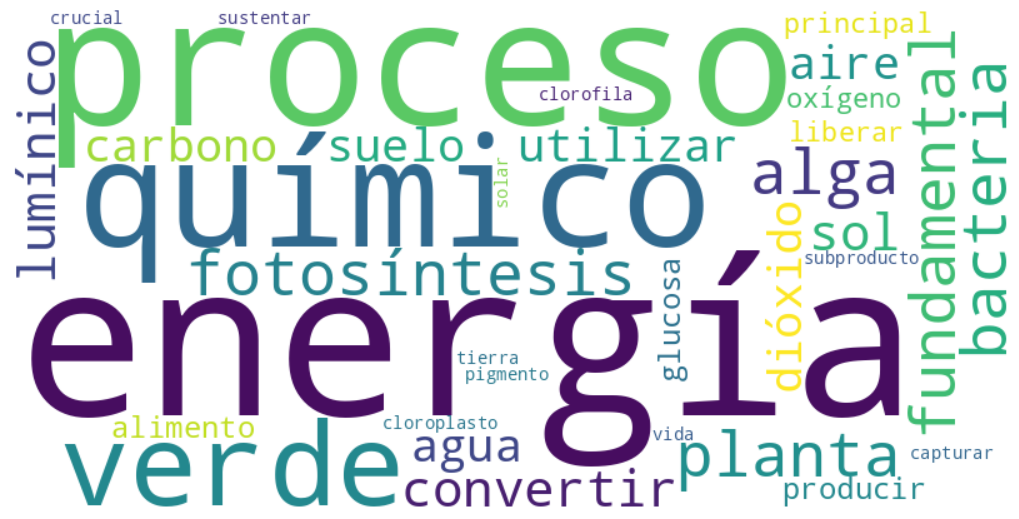

In [ ]:
plt.figure(figsize=(10, 5)) # Tamaño de la figura donde se mostrará
plt.imshow(wordcloud_generator, interpolation='bilinear') # Mostrar la imagen generada
plt.axis("off") # No mostrar los ejes X e Y
plt.tight_layout(pad=0) # Ajustar para que no haya bordes extra
plt.show() # <-- ¡Mostrar la ventana con la nube!